In [1]:
import torch
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

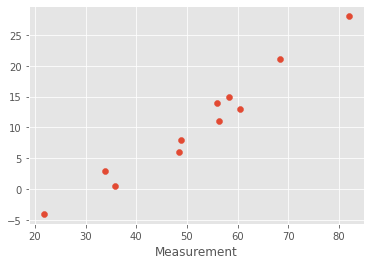

In [3]:
plt.scatter(t_u, t_c)
plt.xlabel('Temperature Celcius')
plt.xlabel('Measurement')
plt.show()

In [4]:
def model(t_u, w, b):
    return w * t_u + b

In [5]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c).pow(2)
    return squared_diffs.mean()

In [6]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [7]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [8]:
delta = 0.1
learning_rate = 1e-2

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
w = w - learning_rate * loss_rate_of_change_w

loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

w, b

(tensor(-44.1730), tensor(46.))

In [9]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [10]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [11]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [12]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, log_every=1, print_params=True):
    for epoch in range(0, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        if not epoch % log_every:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if not torch.isfinite(loss).all():
            break
    return params

In [13]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c
)

Epoch 0, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 1, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 2, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
Epoch 3, Loss 64915905708032.000000
    Params: tensor([8589999.0000,  151310.8906])
    Grad:   tensor([-8.7385e+08, -1.5393e+07])
Epoch 4, Loss 217130525461053440.000000
    Params: tensor([-4.9680e+08, -8.7510e+06])
    Grad:   tensor([5.0539e+10, 8.9023e+08])
Epoch 5, Loss 726257583152928129024.000000
    Params: tensor([2.8732e+10, 5.0610e+08])
    Grad:   tensor([-2.9229e+12, -5.1486e+10])
Epoch 6, Loss 2429183416467662896627712.000000
    Params: tensor([-1.6617e+12, -2.9270e+10])
    Grad:   tensor([1.6904e+14, 2.9776e+12])
Epoch 7, Loss 8125122549611731432050262016.000000
    Params: tensor([9.6102e+13, 1.6928e+12])
   

tensor([-1.8590e+19, -3.2746e+17])

In [14]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c,
    log_every=10
)

Epoch 0, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 10, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
Epoch 20, Loss 29.094959
    Params: tensor([ 0.2323, -0.0199])
    Grad:   tensor([-0.0533,  3.0268])
Epoch 30, Loss 29.085804
    Params: tensor([ 0.2324, -0.0229])
    Grad:   tensor([-0.0532,  3.0262])
Epoch 40, Loss 29.076649
    Params: tensor([ 0.2324, -0.0259])
    Grad:   tensor([-0.0533,  3.0257])
Epoch 50, Loss 29.067486
    Params: tensor([ 0.2325, -0.0290])
    Grad:   tensor([-0.0533,  3.0252])
Epoch 60, Loss 29.058336
    Params: tensor([ 0.2325, -0.0320])
    Grad:   tensor([-0.0533,  3.0247])
Epoch 70, Loss 29.049183
    Params: tensor([ 0.2326, -0.0350])
    Grad:   tensor([-0.0533,  3.0241])
Epoch 80, Loss 29.040039
    Params: tensor([ 0.2326, -0.0380])
    Grad:   tensor([-0.0534,  3.0236])
Epoch 90, Loss 29.030895
    Params: tensor([ 0.2327, -0.0411])
    Gr

tensor([ 0.2327, -0.0441])

In [15]:
t_un = 0.1 * t_u
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,
    log_every=10
)

Epoch 0, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 10, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
Epoch 20, Loss 28.072151
    Params: tensor([ 2.3797, -0.3903])
    Grad:   tensor([-0.5084,  2.8783])
Epoch 30, Loss 27.231512
    Params: tensor([ 2.4301, -0.6754])
    Grad:   tensor([-0.4999,  2.8297])
Epoch 40, Loss 26.418974
    Params: tensor([ 2.4796, -0.9558])
    Grad:   tensor([-0.4915,  2.7820])
Epoch 50, Loss 25.633600
    Params: tensor([ 2.5283, -1.2314])
    Grad:   tensor([-0.4832,  2.7351])
Epoch 60, Loss 24.874483
    Params: tensor([ 2.5762, -1.5024])
    Grad:   tensor([-0.4750,  2.6890])
Epoch 70, Loss 24.140741
    Params: tensor([ 2.6232, -1.7688])
    Grad:   tensor([-0.4670,  2.6437])
Epoch 80, Loss 23.431538
    Params: tensor([ 2.6695, -2.0307])
    Grad:   tensor([-0.4591,  2.5991])
Epoch 90, Loss 22.746044
    Params: tensor([ 2.7150, -2.2882])
    Grad: 

tensor([ 2.7597, -2.5413])

In [16]:
t_un = 0.1 * t_u
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,
    log_every=500,
    print_params=False
)
params

Epoch 0, Loss 80.364342
Epoch 500, Loss 7.843369
Epoch 1000, Loss 3.825483
Epoch 1500, Loss 3.091630
Epoch 2000, Loss 2.957596
Epoch 2500, Loss 2.933116
Epoch 3000, Loss 2.928646
Epoch 3500, Loss 2.927829
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012])

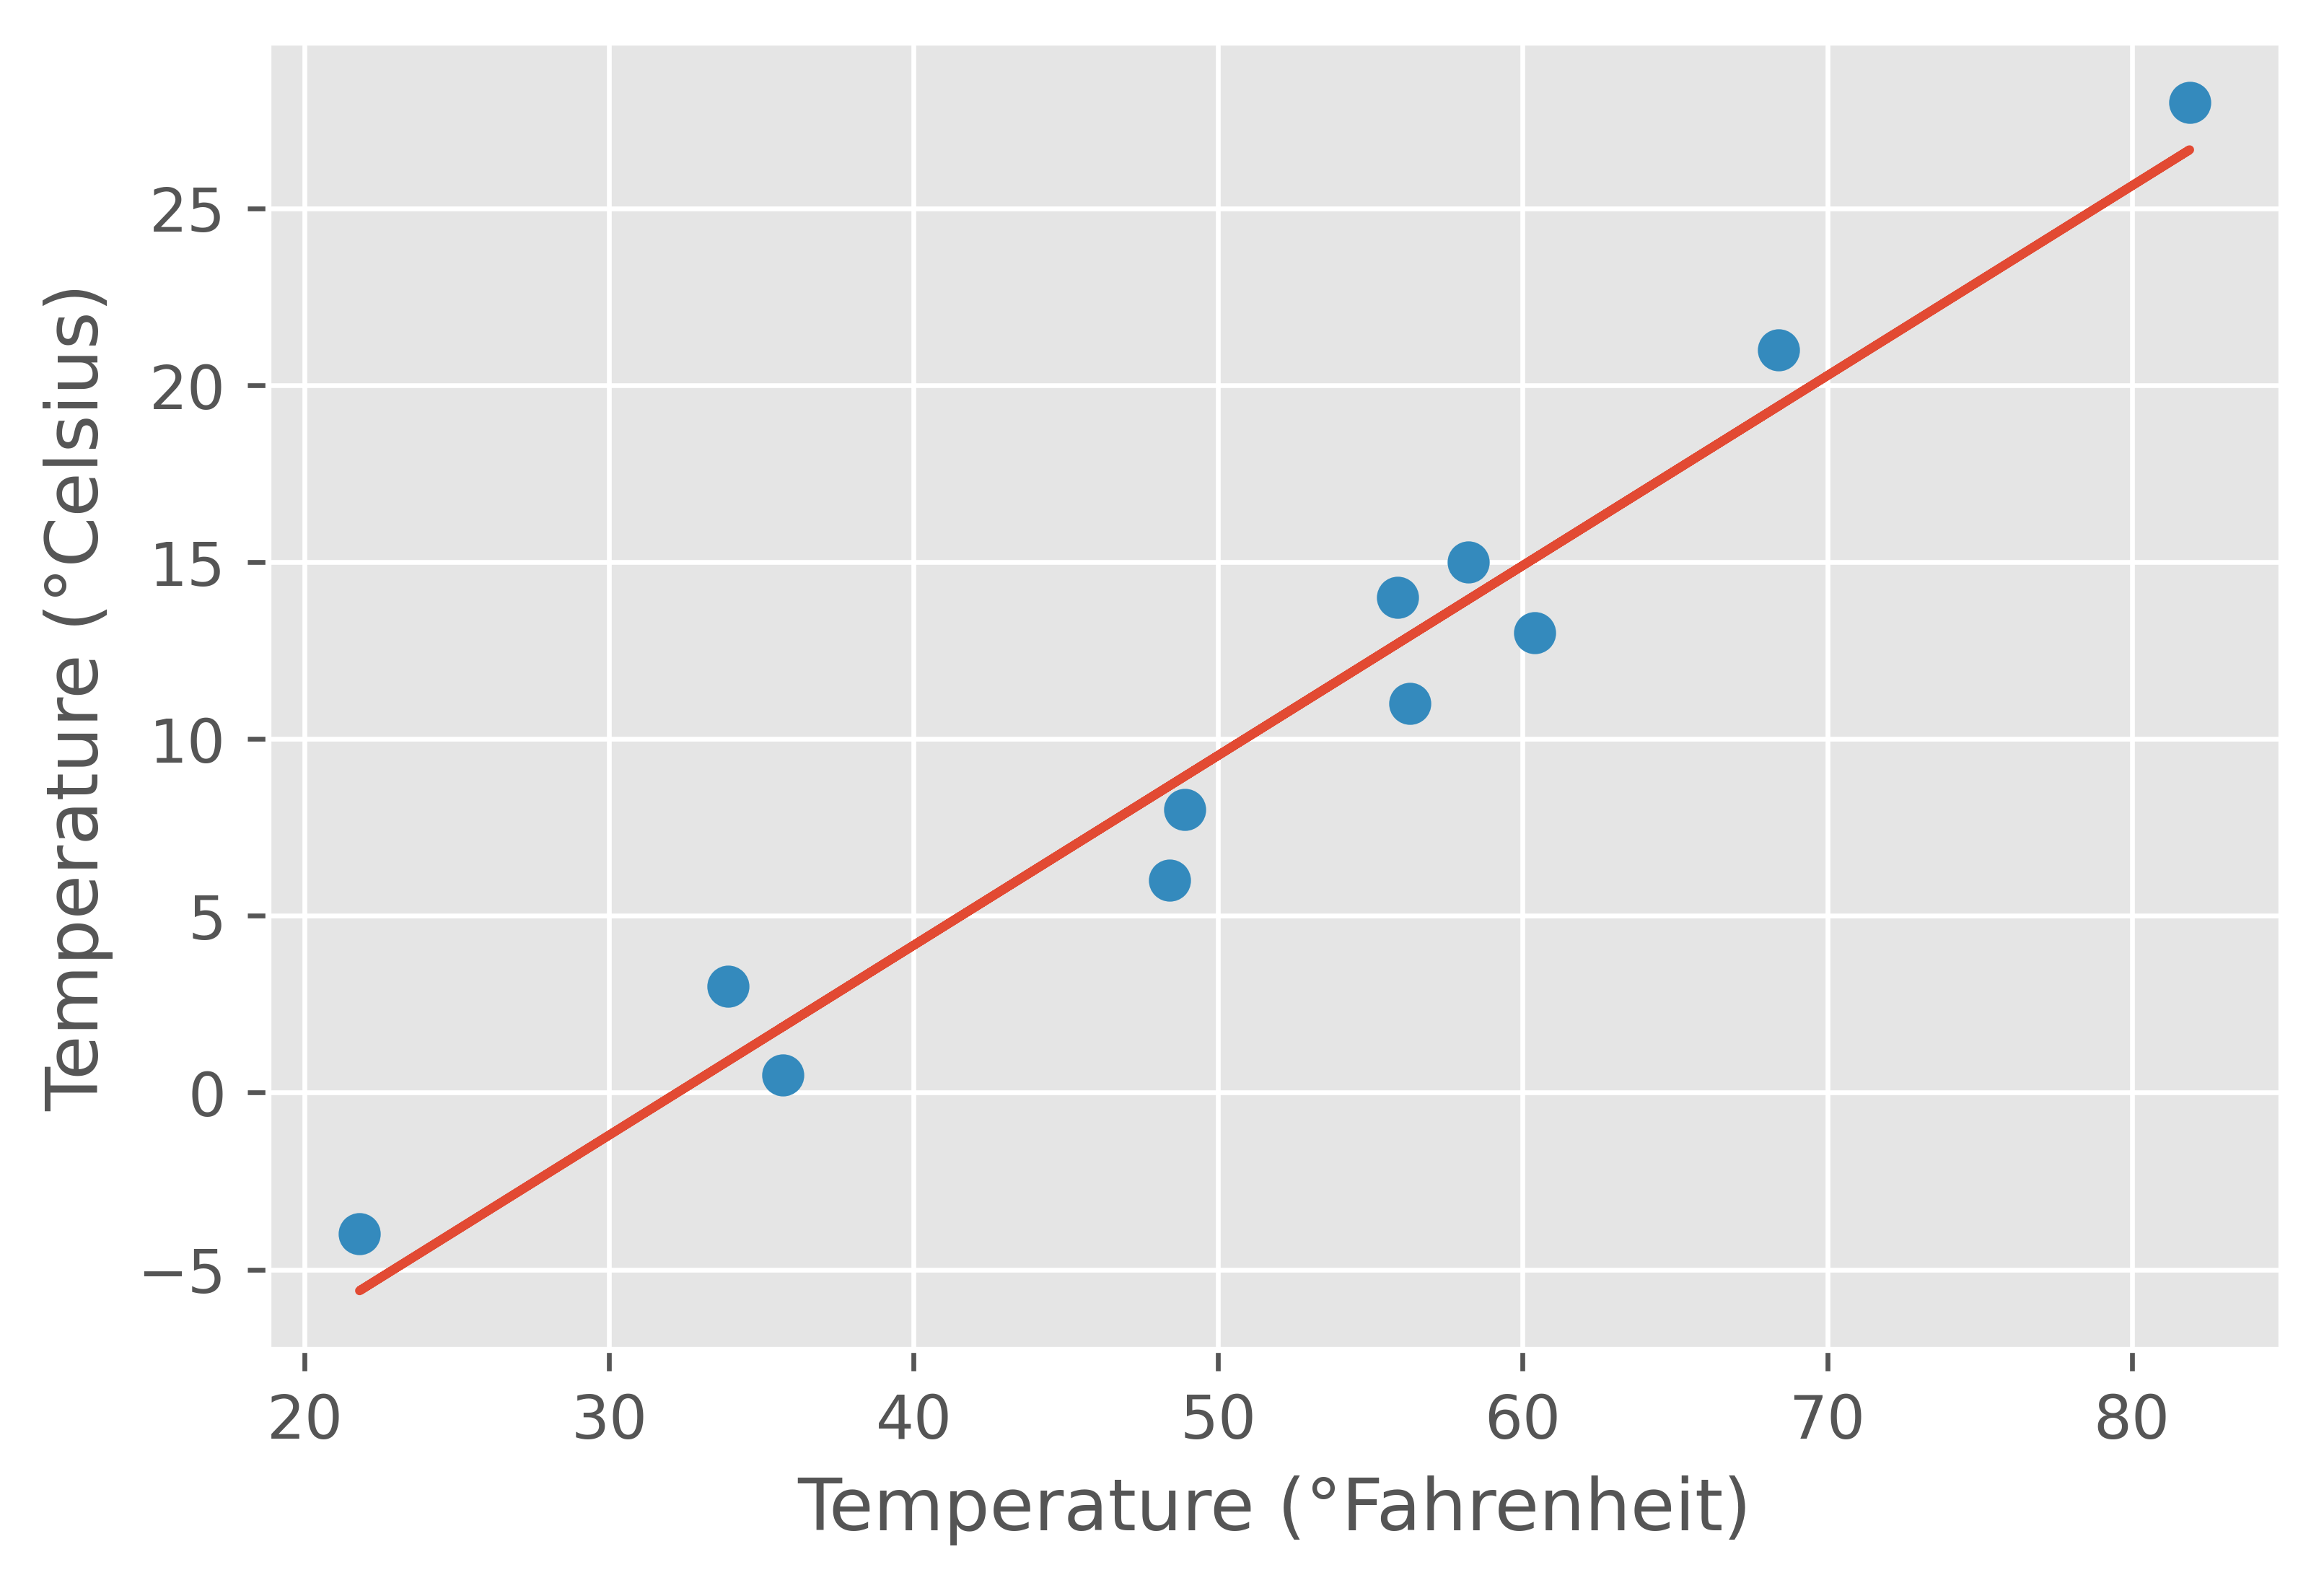

In [17]:
t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()